<a href="https://colab.research.google.com/github/Aninha-create/Alura_final/blob/main/challenge2X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Challenge segunda parte: Analisando e prevendo a evasão de clientes na empresa TelecomX com estatística e modelo preditivo.
---

Objetivos do Projeto
- Realizar o pré-processamento dos dados, incluindo limpeza, codificação de variáveis categóricas e padronização dos valores, preparando o conjunto para a etapa de modelagem.
- Investigar as relações entre as variáveis por meio de análise de correlação, identificando quais atributos têm maior relevância para o problema.
- Implementar e treinar pelo menos dois algoritmos de classificação, comparando seus desempenhos.
- Avaliar os modelos com base em métricas apropriadas, como acurácia, precisão, recall e F1-score, além de interpretar os resultados obtidos.
- Apontar, com base nas análises, os principais fatores que contribuem para a evasão de clientes, oferecendo uma conclusão estratégica que possa orientar ações futuras.
---


##Carregando os dados para início das análises

In [2]:
import pandas as pd
pd.read_csv('/content/dados_tratados (1).csv')
df = pd.read_csv('/content/dados_tratados (1).csv')

In [3]:
#visualizando o dataframe
df.head()

,genero,idoso,possui_parceiro,dependentes,meses_com_empresa,servico_telefone,multiplas_linhas,tipo_internet,seguranca_online,backup_online,...,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,conta_diaria,cobranca_mensal,cobranca_total,id_cliente,evasão
0,female,0,yes,yes,9,yes,no,dsl,no,yes,...,yes,no,one year,yes,mailed check,2.19,65.6,593.30,0002-orfbo,no
1,male,0,no,no,9,yes,yes,dsl,no,no,...,no,yes,month-to-month,no,mailed check,2.00,59.9,542.40,0003-mknfe,no
2,male,0,no,no,4,yes,no,fiber optic,no,no,...,no,no,month-to-month,yes,electronic check,2.46,73.9,280.85,0004-tlhlj,yes
3,male,1,yes,no,13,yes,no,fiber optic,no,yes,...,yes,yes,month-to-month,yes,electronic check,3.27,98.0,1237.85,0011-igkff,yes
4,female,1,yes,no,3,yes,no,fiber optic,no,no,...,yes,no,month-to-month,yes,mailed check,2.80,83.9,267.40,0013-exchz,yes


In [4]:
ordem_colunas = [
    'evasão',
    'meses_com_empresa',
    'cobranca_mensal',
    'cobranca_total',
    'genero',
    'idoso',
    'possui_parceiro',
    'dependentes',
    'servico_telefone',
    'tipo_internet',
    'streaming_tv',
    'streaming_filmes',
    'tipo_contrato',
    'fatura_digital',
    'metodo_pagamento',
    'multiplas_linhas',
    'seguranca_online',
    'backup_online',
    'id_cliente', 'conta_diaria'
]

In [5]:
df = df[ordem_colunas]
df.head()

,evasão,meses_com_empresa,cobranca_mensal,cobranca_total,genero,idoso,possui_parceiro,dependentes,servico_telefone,tipo_internet,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,multiplas_linhas,seguranca_online,backup_online,id_cliente,conta_diaria
0,no,9,65.6,593.30,female,0,yes,yes,yes,dsl,yes,no,one year,yes,mailed check,no,no,yes,0002-orfbo,2.19
1,no,9,59.9,542.40,male,0,no,no,yes,dsl,no,yes,month-to-month,no,mailed check,yes,no,no,0003-mknfe,2.00
2,yes,4,73.9,280.85,male,0,no,no,yes,fiber optic,no,no,month-to-month,yes,electronic check,no,no,no,0004-tlhlj,2.46
3,yes,13,98.0,1237.85,male,1,yes,no,yes,fiber optic,yes,yes,month-to-month,yes,electronic check,no,no,yes,0011-igkff,3.27
4,yes,3,83.9,267.40,female,1,yes,no,yes,fiber optic,yes,no,month-to-month,yes,mailed check,no,no,no,0013-exchz,2.80


##Preparando os dados

In [6]:
#Removendo coluna id_cliente
df.drop('id_cliente', axis=1, inplace=True)

In [7]:
# Verificando Colunas e seus valores únicos
print(df.nunique())

evasão                  2
meses_com_empresa      73
cobranca_mensal      1585
cobranca_total       6531
genero                  2
idoso                   2
possui_parceiro         2
dependentes             2
servico_telefone        2
tipo_internet           3
streaming_tv            3
streaming_filmes        3
tipo_contrato           3
fatura_digital          2
metodo_pagamento        4
multiplas_linhas        3
seguranca_online        3
backup_online           3
conta_diaria          321
dtype: int64


In [8]:
# Informações dos tipos de valores na colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   evasão             7043 non-null   object 
 1   meses_com_empresa  7043 non-null   int64  
 2   cobranca_mensal    7043 non-null   float64
 3   cobranca_total     7043 non-null   float64
 4   genero             7043 non-null   object 
 5   idoso              7043 non-null   int64  
 6   possui_parceiro    7043 non-null   object 
 7   dependentes        7043 non-null   object 
 8   servico_telefone   7043 non-null   object 
 9   tipo_internet      7043 non-null   object 
 10  streaming_tv       7043 non-null   object 
 11  streaming_filmes   7043 non-null   object 
 12  tipo_contrato      7043 non-null   object 
 13  fatura_digital     7043 non-null   object 
 14  metodo_pagamento   7043 non-null   object 
 15  multiplas_linhas   7043 non-null   object 
 16  seguranca_online   7043 

In [9]:
#Verificando para remoção, se tiver.
print("\nColunas com apenas um valor único:")
print(df.columns[df.nunique() == 1].tolist() or "Nenhuma encontrada.")


Colunas com apenas um valor único:
Nenhuma encontrada.


In [10]:
# Identificando todo tipo de colunas
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
colunas_binarias = [col for col in df.columns if df[col].nunique() == 2]
colunas_categoricas = [col for col in df.select_dtypes(include=['object', 'bool']).columns if df[col].nunique() > 2]

# Exibindo o resultado
print("Numéricas:", colunas_numericas)
print("Binárias:", colunas_binarias)
print("Categóricas:", colunas_categoricas)

Numéricas: ['meses_com_empresa', 'cobranca_mensal', 'cobranca_total', 'idoso', 'conta_diaria']
Binárias: ['evasão', 'genero', 'idoso', 'possui_parceiro', 'dependentes', 'servico_telefone', 'fatura_digital']
Categóricas: ['tipo_internet', 'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'metodo_pagamento', 'multiplas_linhas', 'seguranca_online', 'backup_online']


In [11]:
# Variáveis que eu quero na coluna categórica
categoricas_personalizadas = [
    'genero', 'idoso', 'possui_parceiro', 'dependentes', 'servico_telefone',
    'tipo_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'streaming_tv', 'streaming_filmes',
    'tipo_contrato', 'fatura_digital', 'metodo_pagamento', 'multiplas_linhas'
]

# Variáveis que eu quero na coluna numérica
numericas_personalizadas = [
    'evasão', 'meses_com_empresa', 'cobranca_mensal', 'cobranca_total', 'conta_diaria'
]

# Inicializa listas limpas
colunas_categoricas = []
colunas_numericas = []

# Inserindo como solicitei
for col in df.columns:
    if col in categoricas_personalizadas:
        colunas_categoricas.append(col)
    elif col in numericas_personalizadas:
        colunas_numericas.append(col)

# Exibindo o resultado
print("Categóricas:", colunas_categoricas)
print("Numéricas:", colunas_numericas)

Categóricas: ['genero', 'idoso', 'possui_parceiro', 'dependentes', 'servico_telefone', 'tipo_internet', 'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'fatura_digital', 'metodo_pagamento', 'multiplas_linhas', 'seguranca_online', 'backup_online']
Numéricas: ['evasão', 'meses_com_empresa', 'cobranca_mensal', 'cobranca_total', 'conta_diaria']


In [12]:
df['evasão'] = df['evasão'].map({'no': 0, 'yes': 1})

##Pré processamento dos dados para machine learning

In [13]:
# aplicando o one-hot encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True, dtype=int)
df_encoded

,evasão,meses_com_empresa,cobranca_mensal,cobranca_total,conta_diaria,genero_male,idoso_1,possui_parceiro_yes,dependentes_yes,servico_telefone_yes,...,fatura_digital_yes,metodo_pagamento_credit card (automatic),metodo_pagamento_electronic check,metodo_pagamento_mailed check,multiplas_linhas_no phone service,multiplas_linhas_yes,seguranca_online_no internet service,seguranca_online_yes,backup_online_no internet service,backup_online_yes
0,0,9,65.60,593.30,2.19,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.90,542.40,2.00,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,1,4,73.90,280.85,2.46,1,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
3,1,13,98.00,1237.85,3.27,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,1
4,1,3,83.90,267.40,2.80,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,1.84,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
7039,1,22,85.10,1873.70,2.84,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0
7040,0,2,50.30,92.75,1.68,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
7041,0,67,67.85,4627.65,2.26,1,0,1,1,1,...,0,0,0,1,0,0,0,1,0,0


## Início das análise do Status de evasão e correlação e seleção das variáveis

In [14]:
# Contagem dos valores de evasão
evasão_cont = df['evasão'].value_counts()
evasão_cont_prop = df['evasão'].value_counts(normalize=True) * 100

# Resultados com acesso seguro por posição
resultados = {
    "Status": ["Ativos (evasão = 0)", "Evadiram (evasão = 1)"],
    "Quantidade": [evasão_cont.iloc[0], evasão_cont.iloc[1]],
    "Proporção (%)": [f"{evasão_cont_prop.iloc[0]:.2f}%", f"{evasão_cont_prop.iloc[1]:.2f}%"]
}

results_df = pd.DataFrame(resultados)

print("Proporção de Clientes Ativos vs. Clientes que Evadiram:")
print(results_df.to_string(index=False))

Proporção de Clientes Ativos vs. Clientes que Evadiram:
               Status  Quantidade Proporção (%)
  Ativos (evasão = 0)        5174        73.46%
Evadiram (evasão = 1)        1869        26.54%


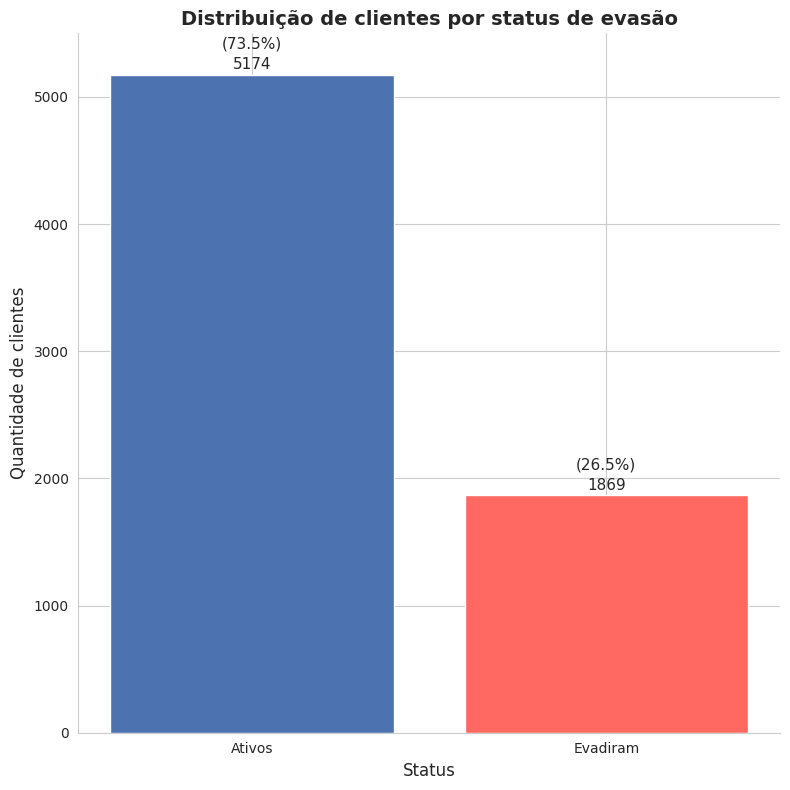

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
status = ['Ativos', 'Evadiram']
quantidade = [5174, 1869]
proporcao = ['73.5%', '26.5%']

# Ordenação decrescente
sorted_data = sorted(zip(quantidade, status, proporcao), reverse=True)
quantidade_sorted, status_sorted, proporcao_sorted = zip(*sorted_data)

# Estilo
sns.set_style("whitegrid")

# Tamanho ajustado do gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Cores
colors = ['#4C72B0', '#FF6961']

# Barras
bars = ax.bar(status_sorted, quantidade_sorted, color=colors)

# Rótulos acima das barras
for bar, qtd, pct in zip(bars, quantidade_sorted, proporcao_sorted):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 20, f'{qtd}', ha='center', va='bottom', fontsize=11)
    ax.text(bar.get_x() + bar.get_width()/2, height + 180, f'({pct})', ha='center', va='bottom', fontsize=11)

# Título e eixos
ax.set_title('Distribuição de clientes por status de evasão', fontsize=14, weight='bold')
ax.set_ylabel('Quantidade de clientes', fontsize=12)
ax.set_xlabel('Status', fontsize=12)

# Eixo Y
ax.set_ylim(0, 5500)
ax.set_yticks(range(0, 5501, 1000))

# Remoção das bordas superior e direita
sns.despine(top=True, right=True)

# Layout final
plt.tight_layout()
plt.savefig('distribuicao_clientes_evasao.png')
plt.show()

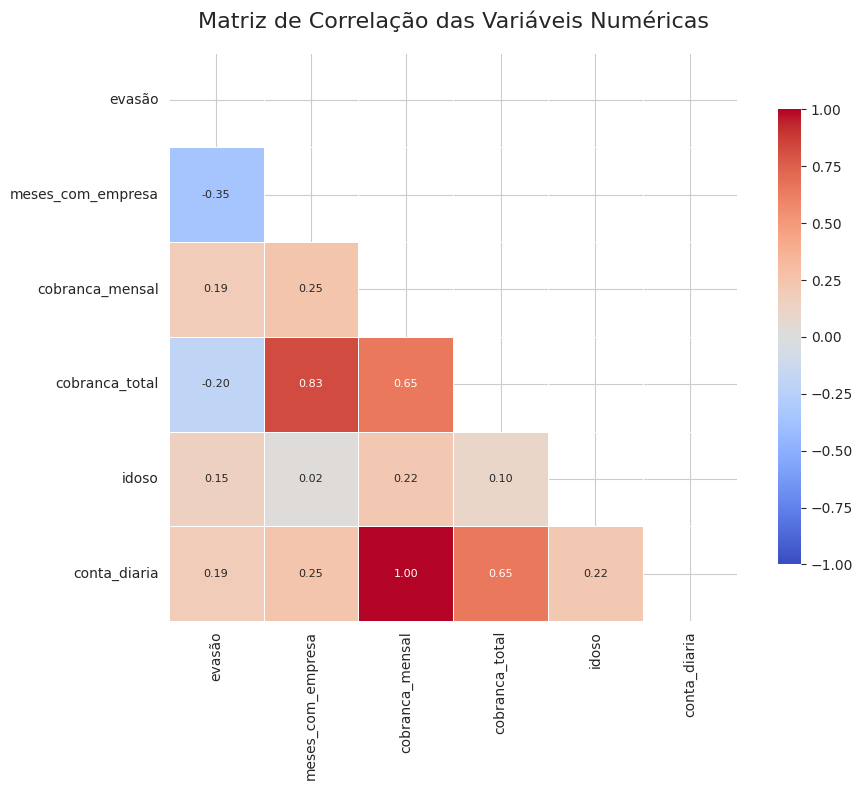

In [16]:
import numpy as np

# Selecionando as colunas numéricas
valores_numericos = df.select_dtypes(include=['int64', 'float64', 'bool'])


# Calculando a matriz de correlação
matriz_correlacao = valores_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(matriz_correlacao,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 8},
            cbar_kws={"shrink": .8},
            vmin=-1,
            vmax=1,
            mask=np.triu(matriz_correlacao),
            square=True)

plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16, pad=18)
plt.tight_layout()
plt.savefig('matriz_correlacao_numericas.png')
plt.show()

Interpretação da Correlação

Evasão x Meses com a empresa → -0.35
Correlação negativa moderada → quanto mais tempo o cliente permanece, menor a chance de evasão.

Evasão x Cobrança mensal / Conta diária → 0.19
Correlação fraca, mas positiva → clientes que pagam mais por mês ou por dia têm um pouco mais de chance de evadir. Por estar associado ao custo-benefício.

Evasão x Cobrança total → -0.20
Correlação negativa fraca → clientes que já gastaram bastante no total tendem a permanecer.

Evasão x Idoso → 0.15
Correlação bem fraca → idosos evadem um pouco mais, mas não é tão significativo.

## Criação e análises gráficas

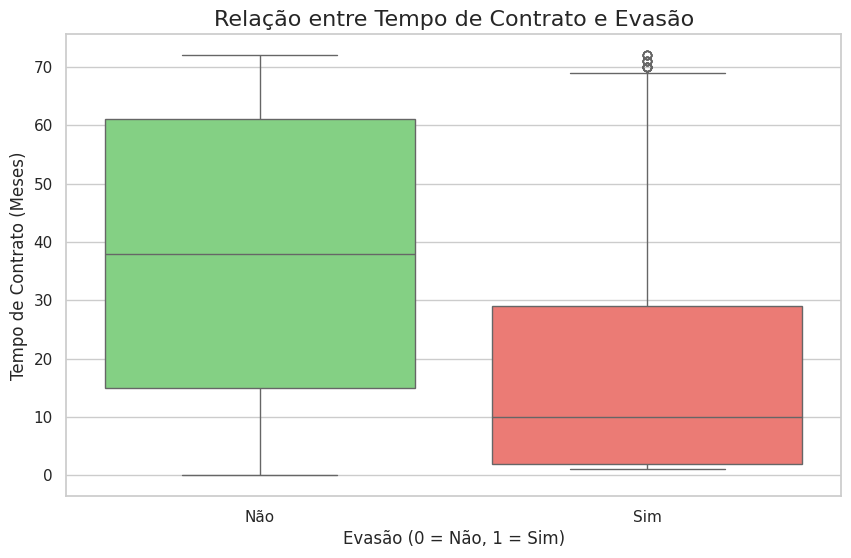

In [17]:
# Configurar o estilo dos gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Garantir que a coluna 'evasão' exista e seja numérica antes de mapear
# (Isso é para garantir que a célula funcione mesmo se executada isoladamente)
if 'evasão' in df.columns and pd.api.types.is_numeric_dtype(df['evasão']):
    # Se 'evasão' já é numérica (0 ou 1), criar o rótulo diretamente
    df['evasão_Label'] = df['evasão'].map({0: 'Ativo', 1: 'Evadiu'})
elif 'evasão' in df.columns and pd.api.types.is_object_dtype(df['evasão']):
     # If 'evasão' is still object type, perform mapping to numeric first
     df['evasão'] = df['evasão'].map({'no': 0, 'yes': 1})
     df['evasão_Label'] = df['evasão'].map({0: 'Ativo', 1: 'Evadiu'})
else:
    # Caso a coluna 'evasão' não seja encontrada ou esteja em um formato inesperado
    print("Coluna 'evasão' não encontrada ou não está no formato esperado.")
    # Adicione aqui o tratamento adequado para esta situação, se necessário


# Definir a paleta de cores para os gráficos
paleta_cores = {'Ativo': '#77DD77', 'Evadiu': '#FF6961'}

# Criar a coluna 'evasão_Label' mapeando os valores numéricos para rótulos de texto
# df['evasão_Label'] = df['evasão'].map({0: 'Ativo', 1: 'Evadiu'}) # Esta linha já está incluída no bloco if/elif acima


# Gráfico 1: Boxplot de Tempo de Contrato (tenure) vs. Evasão (Churn) ---
plt.figure(figsize=(10, 6))
ax = plt.gca()
sns.boxplot(x='evasão', # Eixo X: coluna 'evasão' (agora numérica 0/1)
            y='meses_com_empresa', # Eixo Y: coluna 'meses_com_empresa'
            ax=ax, # Usar os eixos definidos
            palette=paleta_cores, # Usar a paleta de cores definida
            linewidth=1, # Largura das linhas do boxplot
            legend=False, # Não mostrar a legenda padrão do seaborn
            hue='evasão_Label',  # Usar a nova coluna de rótulo para diferenciar as caixas por cor
            data=df) # Usar o DataFrame 'df'

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Tempo de Contrato e Evasão', fontsize=16)
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12) # Rótulo do eixo X
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12) # Rótulo do eixo Y
plt.xticks([0, 1], ['Não', 'Sim']) # Definir os rótulos dos ticks do eixo X para 'Não' e 'Sim'

# Salvar o gráfico em um arquivo
plt.savefig('relacao_tempo_contrato_evasao.png')
# Exibir o gráfico
plt.show()

Relação entre Tempo de Contrato e Evasão

Análise:
O boxplot confirma a mesma tendência: clientes que ficaram menos tempo (mediana de 10 meses) têm maior evasão. Já os que permanecem mais tempo (mediana próxima a 38 meses) tendem a ser fiéis.

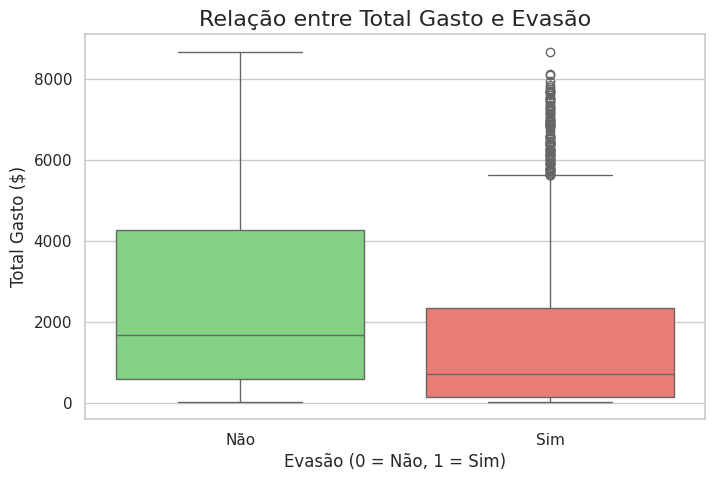

In [18]:
# Gráfico 2: Boxplot do Total Gasto (cobranca_total) vs. Evasão (evasão) ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Garantir que a coluna 'evasão' exista e seja numérica antes de mapear
# (Isso é para garantir que a célula funcione mesmo se executada isoladamente)
if 'evasão' in df.columns and pd.api.types.is_numeric_dtype(df['evasão']):
    # Se 'evasão' já é numérica (0 ou 1), criar o rótulo diretamente
    df['evasão_Label'] = df['evasão'].map({0: 'Ativo', 1: 'Evadiu'})
elif 'evasão' in df.columns and pd.api.types.is_object_dtype(df['evasão']):
     # If 'evasão' is still object type, perform mapping to numeric first
     df['evasão'] = df['evasão'].map({'no': 0, 'yes': 1})
     df['evasão_Label'] = df['evasão'].map({0: 'Ativo', 1: 'Evadiu'})
else:
    # Caso a coluna 'evasão' não seja encontrada ou esteja em um formato inesperado
    print("Coluna 'evasão' não encontrada ou não está no formato esperado.")
    # Adicione aqui o tratamento adequado para esta situação, se necessário

# Definir a paleta de cores para os gráficos
paleta_cores = {'Ativo': '#77DD77', 'Evadiu': '#FF6961'}

# Criar a figura e os eixos para o gráfico Boxplot
plt.figure(figsize=(8, 5))
eixos = plt.gca() # Pega os eixos atuais

# Gerar o gráfico Boxplot
sns.boxplot(x='evasão', # Eixo X: coluna 'evasão' (agora numérica 0/1)
            y='cobranca_total', # Eixo Y: coluna 'cobranca_total'
            ax=eixos, # Usar os eixos definidos
            palette=paleta_cores, # Usar a paleta de cores definida
            linewidth=1, # Largura das linhas do boxplot
            legend=False, # Não mostrar a legenda padrão do seaborn (vamos criar uma personalizada depois se necessário)
            hue='evasão_Label',  # Usar a nova coluna de rótulo para diferenciar as caixas por cor
            data=df) # Usar o DataFrame 'df'

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Total Gasto e Evasão', fontsize=16)
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12) # Rótulo do eixo X
plt.ylabel('Total Gasto ($)', fontsize=12) # Rótulo do eixo Y
plt.xticks([0, 1], ['Não', 'Sim']) # Definir os rótulos dos ticks do eixo X para 'Não' e 'Sim'

# Salvar o gráfico em um arquivo
plt.savefig('relacao_total_gasto_evasao.png')

# Exibir o gráfico
plt.show()

Relação entre Total Gasto e Evasão

Análise:
O gráfico mostra que clientes ativos possuem um gasto total bem mais elevado (mediana em torno de 1700 e com vários chegando acima de 4000).
Já os clientes que evadiram apresentam gasto total muito menor (mediana próxima de 500). Além disso, observa-se que a dispersão entre os evadidos é menor, com concentração em valores baixos de gasto, embora existam alguns outliers que gastaram bastante e mesmo assim saíram da empresa.

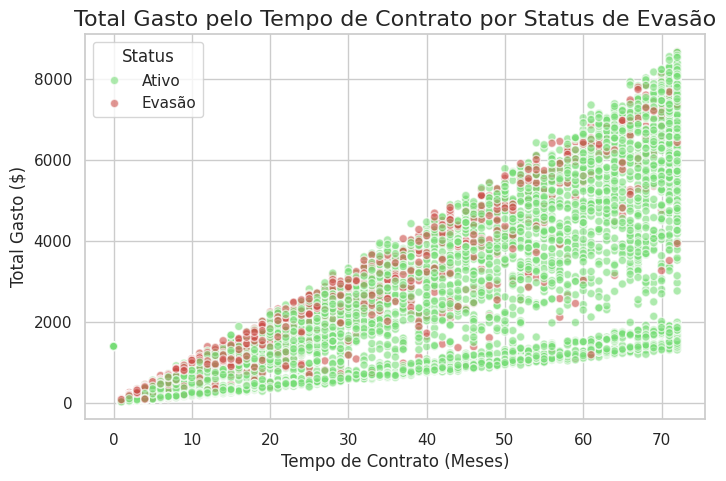

In [19]:
#Gráfico 3: Scatter plot do Total Gasto vs. Tempo de Contrato, colorido pela Evasão

cores = {'Ativo': '#77DD77', 'Evadiu': '#CC4F4A'}

plt.figure(figsize=(8, 5))
scatter_plot = sns.scatterplot(x='meses_com_empresa',
                               y='cobranca_total',
                               hue='evasão_Label',  # Use the new 'evasão_Label' column for hue
                               palette=cores,
                               legend='full',
                               linewidth=1,
                               data=df,
                               alpha=0.6)
plt.title('Total Gasto pelo Tempo de Contrato por Status de Evasão', fontsize=16)
plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
plt.ylabel('Total Gasto ($)', fontsize=12)
handles, labels  =  scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles, ['Ativo', 'Evasão'], title='Status')
plt.savefig('total_gasto_tempo_contrato_evasao.png')
plt.show()

Total Gasto pelo Tempo de Contrato por Status de Evasão

Análise:
O gráfico de dispersão mostra um crescimento linear entre tempo de contrato e total gasto, com clientes ativos concentrados em valores mais altos e clientes evadidos mais espalhados em níveis baixos de gasto.

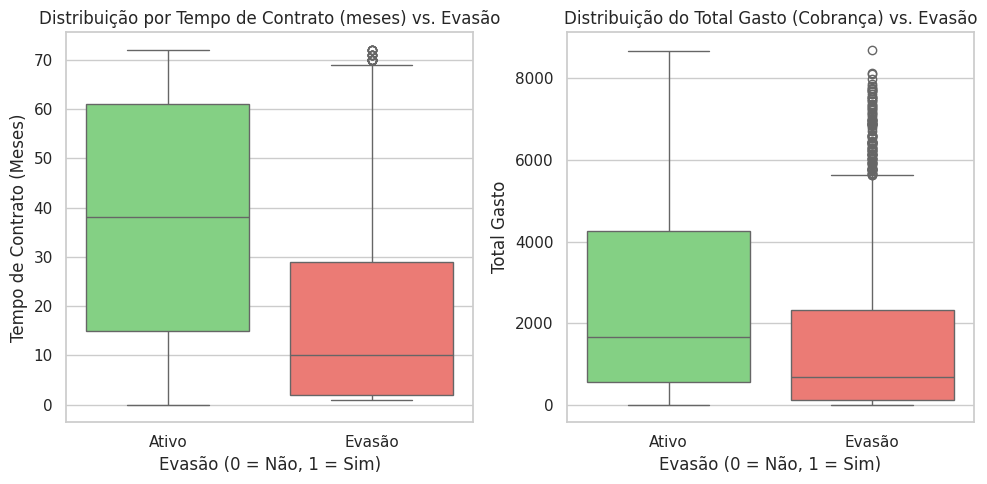

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

cores = {'Ativo': '#77DD77', 'Evadiu': '#FF6961'}

# Plot 1: Boxplot for Tenure vs. Churn
sns.boxplot(x='evasão',
            y='meses_com_empresa',
            palette=cores,
            hue='evasão_Label',
            linewidth=1,
            legend=False,
            ax=axes[0],
            data=df)

axes[0].set_title('Distribuição por Tempo de Contrato (meses) vs. Evasão')
axes[0].set_xlabel('Evasão (0 = Não, 1 = Sim)')
axes[0].set_ylabel('Tempo de Contrato (Meses)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Ativo', 'Evasão'])
# Plot 2: Boxplot for Total Charges vs. Churn
sns.boxplot(x='evasão',
            y='cobranca_total',
            palette=cores,
            hue='evasão_Label',
            linewidth=1,
            legend=False,
            ax=axes[1],
            data=df)

axes[1].set_title('Distribuição do Total Gasto (Cobrança) vs. Evasão')
axes[1].set_xlabel('Evasão (0 = Não, 1 = Sim)')
axes[1].set_ylabel('Total Gasto')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Ativo', 'Evasão'])

plt.tight_layout()
plt.savefig('distribuicao_tempo_contrato_evasao.png')
plt.show()

Distribuição por Tempo de Contrato (meses) vs. Evasão

Análise:
O gráfico mostra que clientes ativos possuem maior tempo de contrato (mediana próxima a 38 meses), enquanto os clientes que evadiram têm tempo bem menor (mediana próxima a 10 meses).
Distribuição do total gasto(Cobrança) vs. Evasão
Análise:
Os clientes ativos apresentam valores significativamente maiores de gasto total (mediana acima de 1700), enquanto clientes evadidos têm gasto bem menor (mediana em torno de 500).

## Iniciando Modelagem preditiva

Modelagem preditiva é uma forma de usar dados do passado para tentar descobrir o que pode acontecer no futuro. Ela ajuda a fazer previsões e tomar decisões com mais segurança, usando ferramentas como estatística e inteligência artificial


---

Separando os dados para treino e teste

In [21]:
# Importando biblioteca para treino e teste
from sklearn.model_selection import train_test_split

In [22]:
# Determinando a variável reposta
X = df_encoded.drop('evasão', axis=1)
y = df_encoded['evasão']

In [23]:
# Armazenando as variáveis treino e teste e separando para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [24]:
print("Proporção de evasão no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nProporção de evasão no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Proporção de evasão no conjunto de treino:
evasão
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Proporção de evasão no conjunto de teste:
evasão
0    0.734501
1    0.265499
Name: proportion, dtype: float64


## Balanceamento dos dados

In [25]:
# Importando a classe SMOTE da biblioteca imblearn
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE()
X_balanceado, y_balanceado = smote.fit_resample(X_train, y_train)

In [27]:
y_balanceado.value_counts(normalize=True)

,proportion
evasão,
0,0.5
1,0.5


## Normalizando os dados

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Criando o dataset normalizado
X_train_norm = scaler.fit_transform(X_balanceado)
X_test_norm = scaler.transform(X_test)

## Desenvolvimento de modelos

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Contruindo o modelo
modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [30]:
# Fazer a previsão do modelo
y_pred_rf = modelo_rf.predict(X_test)


Resultados do Random Forest: 
              precision    recall  f1-score   support

       Ativo       0.83      0.90      0.86      1552
      Evasão       0.63      0.48      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113


AUC: 0.6876349532315269

Matriz de Confusão: 


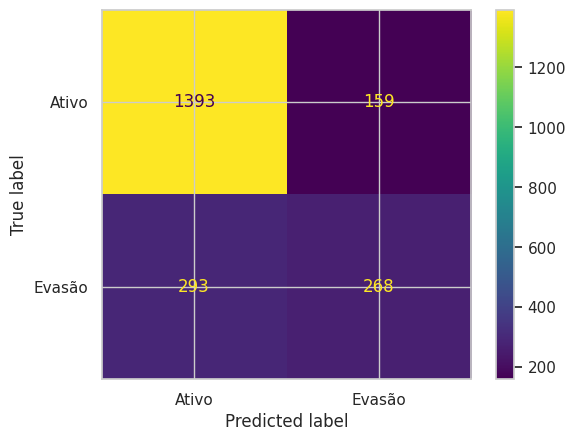

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, classification_report

print("\nResultados do Random Forest: ")
report_rf = classification_report(y_test, y_pred_rf, target_names=['Ativo', 'Evasão'])
print(report_rf)
print(f"\nAUC: {roc_auc_score(y_test, y_pred_rf)}")
print("\nMatriz de Confusão: ")
cm_rf = ConfusionMatrixDisplay.from_estimator(modelo_rf, X_test, y_test, display_labels=['Ativo', 'Evasão'])

## Modelo logístico

In [32]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')
modelo_log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [33]:
# Fazer a previsão no conjunto de teste
y_pred_lr = modelo_log.predict(X_test)


Resultados da Regressão Logística:
              precision    recall  f1-score   support

       Ativo       0.91      0.72      0.80      1552
      Evasão       0.51      0.81      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113



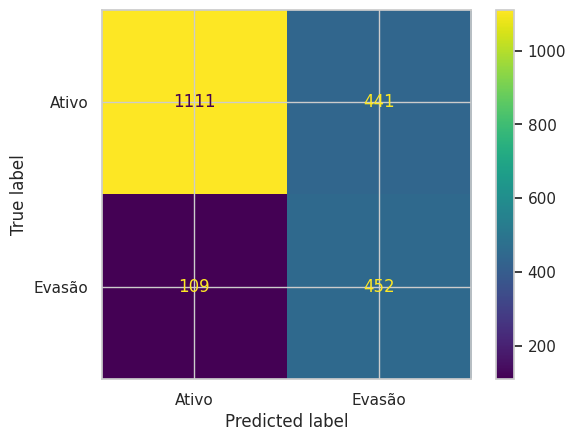

In [34]:
# Avaliar o modelo
print("\nResultados da Regressão Logística:")
report_lr = classification_report(y_test, y_pred_lr, target_names=['Ativo', 'Evasão'])
print(report_lr)
cm_lr = ConfusionMatrixDisplay.from_estimator(modelo_log, X_test, y_test, display_labels=['Ativo', 'Evasão'])

## Avaliando os modelos

📊 Avaliação dos Modelos – Regressão Logística vs Random Forest
Modelo 1 – Regressão Logística

Acurácia: 73%

Precisão (Evasão): 50%

Recall (Evasão): 80%

F1-Score (Evasão): 0.61

Pontos fortes: Encontra 8 em cada 10 evasões → ótimo para campanhas de retenção.
Ponto fraco: Muitos falsos positivos (metade dos alertas não são de evasões).

Modelo 2 – Random Forest

Acurácia: 79%

Precisão (Churn): 63%

Recall (Churn): 47%

F1-Score (Churn): 0.54

Pontos fortes: Alertas mais confiáveis, menos falsos positivos.
Ponto fraco: Perde mais da metade das evasões reais.

🔎 Comparação

Modelo	Pró (Foco em Evasão)

Contra	Ideal para:

Regressão Logística	Recall alto (80%) – captura a maioria das evasões	Precisão moderada (50%) – muitos falsos alarmes	Retenção em massa

Random Forest	Precisão boa (63%) – alertas mais confiáveis	Recall baixo (47%) – perde muitas evasões,	Campanhas seletivas e de alto custo

📌 Conclusão

Vencedor inicial: Regressão Logística, por identificar a maioria dos clientes que iriam cancelar (prioridade do negócio).

Random Forest: Apesar da maior acurácia, não atende bem ao objetivo principal (recall baixo). Deve ser otimizado (hiperparâmetros) e usado futuramente em campanhas mais segmentadas.

👉 Estratégia recomendada:

Implantar Regressão Logística para cobertura ampla de evasão.

Trabalhar em paralelo na otimização do Random Forest para cenários de retenção mais específicos e de alto custo.

## Identificação dos fatores mais influentes

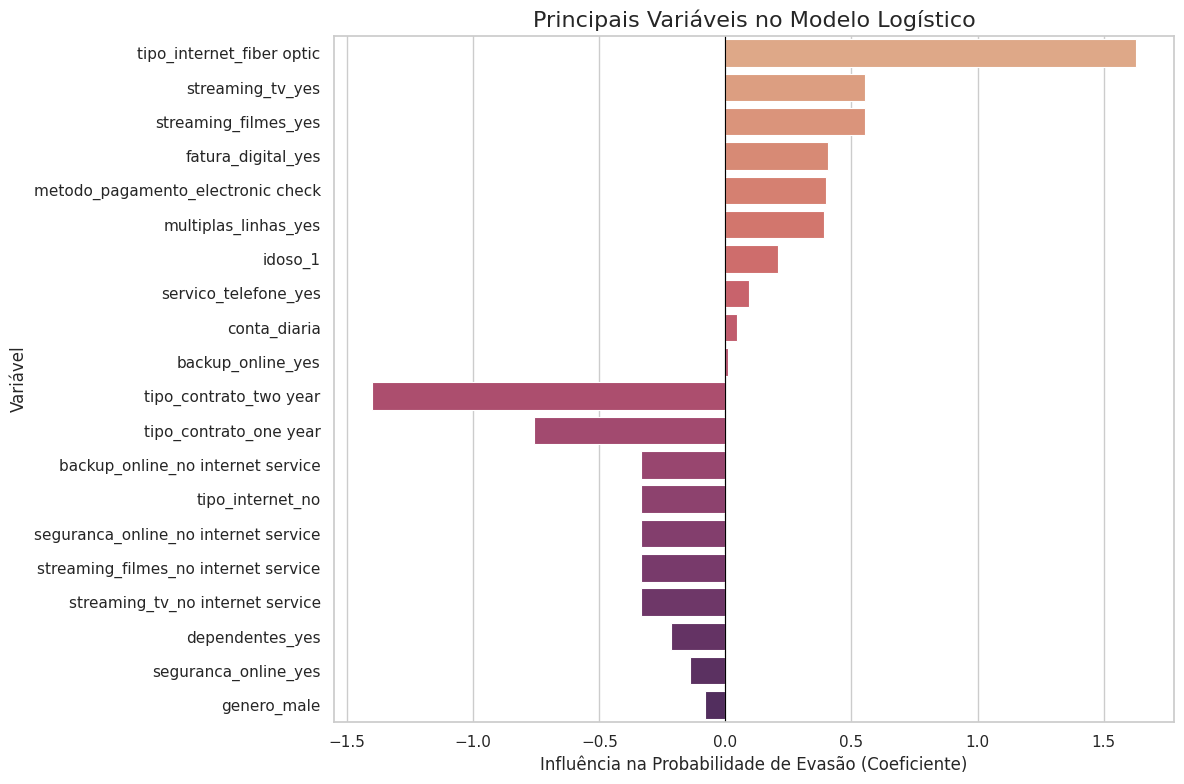

In [50]:
coefficients = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo_log.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

positive_coeffs = coefficients.head(10)
negative_coeffs = coefficients.tail(10).sort_values(by='Coeficiente', ascending=True)

plt.figure(figsize=(12, 8))
coeffs_to_plot = pd.concat([positive_coeffs, negative_coeffs])
sns.barplot(x='Coeficiente',
            y='Variável',
            data=coeffs_to_plot,
            palette='flare',
            hue='Variável',
            linewidth=0.8)

plt.title('Principais Variáveis no Modelo Logístico', fontsize=16)
plt.xlabel('Influência na Probabilidade de Evasão (Coeficiente)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.axvline(0, color='black', lw=0.8)
plt.tight_layout()
plt.savefig('fatores_mais_influentes.png')
plt.show()

## Variáveis que influenciam na probabilidade de evasão

Esses têm coeficientes positivos — ou seja, estão associados a maior risco de evasão:

- 1. tipo_internet_fiber optic: curioso, né? Mesmo sendo uma tecnologia avançada, pode estar ligada a clientes mais exigentes ou com planos mais caros.

- 2. streaming_tv_yes / streaming_filmes_yes: pode indicar perfis mais digitais, que talvez busquem alternativas mais baratas ou flexíveis.

- 3. fatura_digital_yes: talvez correlacionado com menor engajamento ou menor contato humano.

- 4. metodo_pagamento_electronic check: pode sugerir menor fidelização.

- 5. multiplas_linhas_yes: clientes com múltiplas linhas podem ser mais voláteis.

- 6. idoso_1: esse é sensível — pode indicar desafios com tecnologia ou mudanças de perfil de consumo.

- 7. servico_telefone_yes / conta_diaria / backup_online_yes: serviços adicionais nem sempre significam retenção, especialmente se não forem percebidos como úteis.

## Fatores que reduzem a probabilidade de evasão

# Coeficientes negativos — associados à permanência:

- 1. tipo_contrato_two year / one year: contratos mais longos claramente ajudam na retenção.

- 2. backup_online_no internet service / tipo_internet_no: ausência de serviço pode indicar clientes que já saíram ou estão em planos básicos.

- 3. seguranca_online_no internet service / streaming_no internet service: reforça o padrão acima.

- 4. dependentes_yes: clientes com dependentes tendem a manter o serviço.

- 5. seguranca_online_yes / genero_male: podem indicar perfis mais estáveis ou menos propensos à mudança.

## Insight geral:

Seu modelo está captando nuances interessantes — como o paradoxo de serviços digitais estarem associados à evasão. Isso pode ser explorado em estratégias de retenção mais personalizadas, como ofertas específicas para usuários com múltiplas linhas ou serviços de streaming.


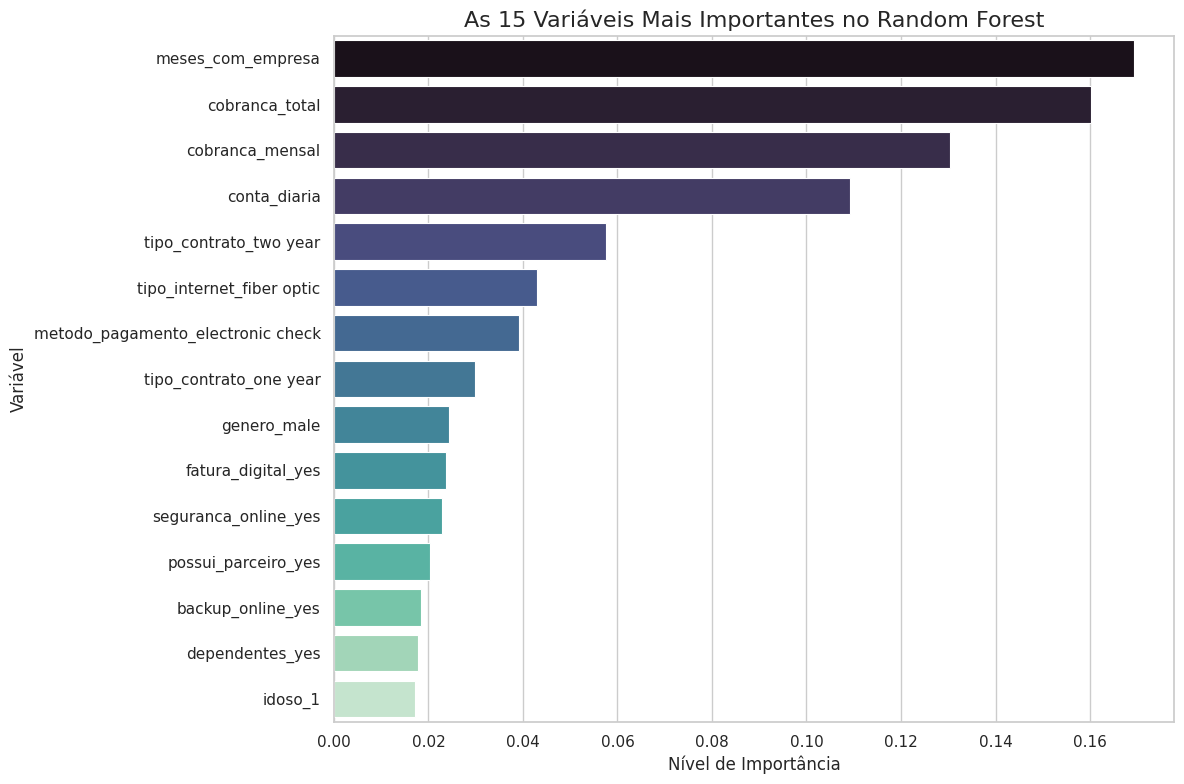

In [48]:
feature_importance = pd.DataFrame({
    'Variável': X.columns,
    'Importância': modelo_rf.feature_importances_
}).sort_values(by='Importância', ascending=False)


top_15_features = feature_importance.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância',
            y='Variável',
            data=top_15_features,
            palette='mako',
            hue='Variável',
            linewidth=0.8)

plt.title('As 15 Variáveis Mais Importantes no Random Forest', fontsize=16)
plt.xlabel('Nível de Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.savefig('as_15_variaveis_mais_importantes.png')
plt.tight_layout()
plt.show()

# Top 5 variáveis mais influentes no Random Forest

- 1. meses_com_empresa

- Quanto mais tempo o cliente está na empresa, menor a chance de evasão. Esse é o fator mais decisivo — fidelidade conta muito!

- 2. cobrança_total

- Clientes com valores acumulados mais altos podem estar mais propensos a sair, talvez por insatisfação ou custo percebido.

- 3. cobrança_mensal

- Similar ao anterior, reforça que o preço mensal impacta diretamente na permanência.

- 4. conta_diaria

- Pode indicar clientes com uso mais intenso ou cobrança diferenciada — e talvez maior risco de evasão se não houver percepção de valor.

- 5. tipo_contrato_two year

- Contratos mais longos são um escudo contra evasão, como já vimos no modelo logístico.

## Outras variaveis relevantes

- tipo_internet_fiber optic: aparece de novo como fator de risco — talvez por expectativas mais altas ou concorrência.
- metodo_pagamento_electronic check: continua sendo um sinal de menor fidelização.
- fatura_digital_yes e backup_online_yes: podem indicar perfis mais digitais, mas também menos engajados.
- idoso_1 e dependentes_yes: mostram que características demográficas influenciam bastante.

## Insight cruzado com o modelo logístico

O Random Forest reforça muitos dos achados do modelo logístico, mas com uma diferença: ele dá mais peso a variáveis quantitativas como tempo de contrato e valores de cobrança. Isso mostra que ele está captando padrões mais complexos e não apenas relações lineares.


## 📊 Relatório Final – Análise de Evasão de Clientes da Telecom X

#1. Objetivo

O estudo teve como propósito identificar fatores que influenciam a evasão (churn) dos clientes da Telecom X, bem como avaliar modelos preditivos capazes de antecipar esse comportamento. O foco estratégico é reduzir a perda de clientes, aumentando a efetividade das campanhas de retenção.

#2. Avaliação dos Modelos Preditivos

Foram comparados dois algoritmos: Regressão Logística e Random Forest, ambos treinados com ponderação de classes para lidar com o desbalanceamento entre clientes que permanecem e os que cancelam.

##🔹 Modelo 1 – Modelo logístico

Recall (Evasão): 80% → identifica 8 em cada 10 clientes que realmente cancelariam.

Precisão (Evasão): 50% → metade dos alertas são falsos positivos.

Acurácia Geral: 73%

F1-Score (Evasão): 0.61

#Interpretação: O modelo prioriza recall, garantindo que a maioria das evasões sejam encontradas, ainda que com custo de falsos alarmes.

##🔹 Modelo 2 – Random Forest

Recall (Evasão): 47% → perde mais da metade das evações.

Precisão (Evasão): 63% → mais confiável nos alertas emitidos.

Acurácia Geral: 79%

F1-Score (Evasão): 0.54

#Interpretação: O modelo é mais conservador, com menos falsos positivos, mas falha no objetivo principal de identificar quem realmente cancelaria.

##🔹 Conclusão Comparativa

Melhor para retenção em massa: Regressão Logística (maior recall).

Melhor para campanhas de alto custo: Random Forest (maior precisão).

##👉 Recomendação inicial: implantar a Regressão Logística, por capturar a maior parte dos churners e oferecer maior impacto no negócio. O Random Forest deve ser otimizado para usos futuros, como campanhas mais segmentadas.

#3. Diagnóstico de Ajuste (Overfitting/Underfitting)

Modelo logístico: bom ajuste, sem sinais de overfitting. Atenção apenas para a precisão baixa, que pode ser trabalhada ajustando o limiar de decisão.

Random Forest: não houve overfitting clássico, mas sim dificuldade em generalizar para a classe minoritária. Recomendado: otimização de hiperparâmetros (max_depth, n_estimators, min_samples_leaf) visando maior recall.

##4. Variáveis que Influenciam a Evasão

🔹 Fatores de risco (associados a maior probabilidade de churn)

tipo_internet_fiber optic → clientes exigentes ou em planos caros.

streaming_tv_yes / streaming_filmes_yes → perfis digitais que buscam alternativas mais baratas.

fatura_digital_yes → menos contato humano.

metodo_pagamento_electronic check → menor fidelização.

multiplas_linhas_yes → maior volatilidade.

idoso_1 → possíveis barreiras tecnológicas.

serviços adicionais (telefone, backup, conta_diaria) → quando não são percebidos como úteis, podem gerar insatisfação.

🔹 Fatores de retenção (associados a menor probabilidade de churn)

tipo_contrato_two year / one year → contratos longos aumentam retenção.

dependentes_yes → clientes com dependentes tendem a manter o serviço.

seguranca_online_yes → associado a maior permanência.

genero_male → perfil mais estável.

ausência de internet/serviços digitais → indica planos básicos ou clientes já fidelizados.

##5. Importância das Variáveis no Random Forest

O modelo destacou como mais influentes:

meses_com_empresa → quanto mais tempo, menor a evasão.

cobrança_total → valores acumulados altos aumentam risco de saída.

cobrança_mensal → preço mensal impacta fortemente a permanência.

conta_diaria → pode indicar uso intenso, mas com risco se não houver valor percebido.

tipo_contrato_two year → proteção clara contra evasão.

Outras relevantes: fiber optic, electronic check, fatura digital, backup online, idoso, dependentes.

##👉 O Random Forest reforça achados do modelo logístico, mas valoriza variáveis quantitativas (tempo de contrato, valores de cobrança), captando padrões mais complexos.

## 6. Insight Estratégico

Preço e tempo de contrato são determinantes para retenção.

Perfis digitais (streaming, fatura digital, pagamento eletrônico) parecem mais propensos a cancelar, possivelmente por buscarem alternativas flexíveis.

Clientes antigos e com contratos longos são naturalmente mais fiéis.

Clientes idosos e com múltiplas linhas exigem atenção especial, seja com suporte diferenciado, seja com planos mais atrativos.

## 7. Conclusão Final

Vencedor para implantação imediata: Modelo logístico → maior recall, maior impacto em campanhas de retenção em massa.

Random Forest: deve ser otimizado e considerado em estratégias específicas, principalmente quando o custo de contato for alto e a precisão se tornar mais relevante.

# 📌 Resumo estratégico:

#Usar Regressão Logística como modelo base de retenção.

#Trabalhar Random Forest em paralelo, com foco em campanhas mais segmentadas.

#Direcionar ações para clientes digitais, de alto valor e em planos mais caros, pois são os mais propensos a evasão.

#Fortalecer a retenção em clientes com contratos longos e dependentes, aproveitando seu maior potencial de fidelidade.